In [2]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

import numpy as np
import datetime as dt
import json
import math
from swiper.lattice_surgery_schedule import LatticeSurgerySchedule
from swiper.schedule_experiments import RegularTSchedule
from swiper.simulator import DecodingSimulator
import swiper.plot as plotter

In [3]:
loaded = LatticeSurgerySchedule.from_str(open('benchmarks/cached_schedules/msd_15to1.lss', 'r').read())

In [57]:
generator = np.random.default_rng(2)
decoder_dists = json.load(open('benchmarks/data/decoder_dists.json', 'r'))
decoder_dist = {}
for dist_str, dist_dict in decoder_dists.items():
    if int(dist_str) == 15:
        decoder_dist = {int(k):v for k,v in dist_dict.items()}
decoding_latency_fn = lambda volume: generator.choice(decoder_dist[max(2, math.ceil(volume / 15))])

In [69]:
simulator = DecodingSimulator()
success, _, device_data, window_data, decoding_data = simulator.run(
    schedule=loaded,
    distance=15,
    scheduling_method='aligned',
    decoding_latency_fn=decoding_latency_fn,
    speculation_mode=None,
    speculation_latency=1,
    speculation_accuracy=0.9,
    missed_speculation_modifier=1.4,
    poison_policy='successors',
    max_parallel_processes=None,
    print_interval=dt.timedelta(seconds=10),
    save_animation_frames=False,
    lightweight_setting=0,
    rng=0
)

2025-02-12 19:15:39 | Starting simulation


2025-02-12 19:15:39 | Simulation update: decoder round 1, completed instructions: 0/130, actively running or decoding instructions: 2, waiting windows: 0/0. Max active instruction index: 50
2025-02-12 19:15:40 | Finished simulation


In [70]:
device_data.num_rounds, decoding_data.max_parallel_decoders

(358, 46)

TypeError: 'NoneType' object is not iterable

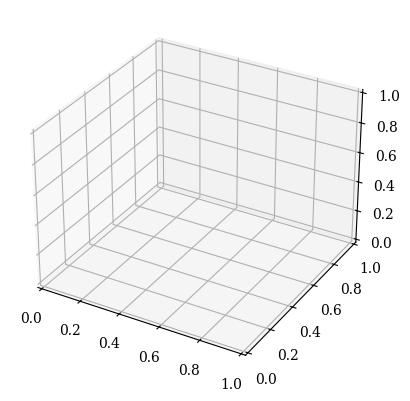

In [35]:
# plotter.plot_device_schedule_trace(device_data, hide_z_ticks=True, z_min=500,
# z_max=600)
plotter.plot_device_schedule_trace(device_data, z_max=300)